In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('seaborn-white')
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('bright')

%matplotlib inline
DATEMAX = 13

In [2]:
df = pd.read_csv('MethodsComp_summary.csv')
df.head()

,date_init,IEC_init,IEC_fin,IEC_dur,methods_init,SS_fin,SS_dur,PSO_fin,PSO_dur,Freq_fin,Freq_dur,rand_on_fin,rand_on_dur,rand_off_fin,rand_off_dur,QL_on_fin,QL_on_dur,QL_off_fin,QL_off_dur
0,0,1020.0,25550.0,25550.0,1013.0,20604.0,20604.0,19610.0,19610.0,19610.0,19610.0,21232.0,21232.0,21243.0,21243.0,21233.0,21233.0,21240.0,21240.0
1,1440,2100.0,25570.0,24130.0,2094.0,20604.0,19164.0,19610.0,18170.0,19610.0,18170.0,22344.0,20904.0,21231.0,19791.0,21230.0,19790.0,21231.0,19791.0
2,2880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4320,4830.0,29200.0,24880.0,4828.0,22375.0,18055.0,20604.0,16284.0,19588.0,15268.0,24928.0,20608.0,24937.0,20617.0,24922.0,20602.0,22402.0,18082.0
4,5760,6290.0,29450.0,23690.0,6274.0,24948.0,19188.0,24909.0,19149.0,21230.0,15470.0,25624.0,19864.0,25536.0,19776.0,25625.0,19865.0,25544.0,19784.0


### 1. Initial loss comparison by missing data : IEC vs methods

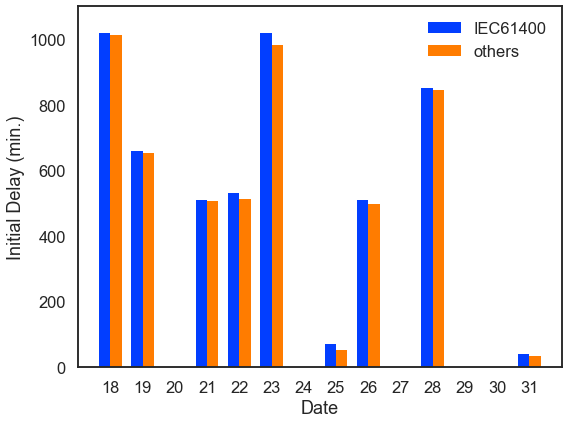

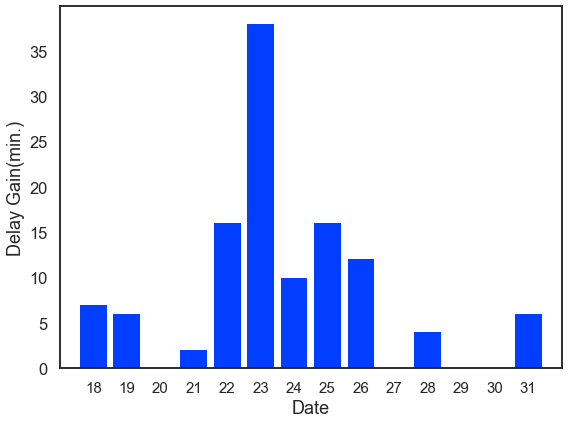

In [3]:
df['IEC_loss'] = df['IEC_init'] - df['date_init']
df['methods_loss'] = df['methods_init'] - df['date_init']
df['date'] = df.index + 18
df['delta_loss'] = df['IEC_init'] - df['methods_init']

X = df.index

width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(df['date']-width/2, df['IEC_loss'], width, label='IEC61400', linewidth=0)
rects2 = ax.bar(df['date']+width/2, df['methods_loss'], width, label='others', linewidth=0)

ax.set_ylabel('Initial Delay (min.)')
ax.set_xlabel('Date')
ax.set_xlim(17, 32)
ax.set_xticks(df['date'])
ax.set_ylim(0, 1100)
ax.legend()

fig.tight_layout()
plt.savefig('MethodsComp_InitialDelay.png')
plt.show()
plt.close()

#################

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(df['date'], df['delta_loss'], linewidth=0)
ax.set_xlim(17, 32)
ax.set_ylabel('Delay Gain(min.)')
ax.set_xlabel('Date')
ax.set_xticks(df['date'])
ax.tick_params(axis='x', labelsize=15)

fig.tight_layout()
plt.savefig('MethodsComp_InitialDelayGain.png')
plt.show()
plt.close()

### 2. Duration Comparison

In [4]:
df_dur = df[['IEC_dur', 'SS_dur', 'PSO_dur', 'Freq_dur', 'rand_on_dur', 'rand_off_dur', 'QL_on_dur', 'QL_off_dur']]
df_dur.describe()

,IEC_dur,SS_dur,PSO_dur,Freq_dur,rand_on_dur,rand_off_dur,QL_on_dur,QL_off_dur
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,19456.923077,17431.000000,16238.769231,15542.153846,18248.615385,17861.846154,17744.769231,17607.076923
std,4442.222388,2775.517159,2385.409404,2196.084350,3226.359159,2922.685490,2947.733512,2790.061363
min,12940.000000,12056.000000,11547.000000,11548.000000,12473.000000,12468.000000,12471.000000,12471.000000
25%,15670.000000,15724.000000,15253.000000,14225.000000,15723.000000,15668.000000,15268.000000,15671.000000
50%,19430.000000,18055.000000,16313.000000,15268.000000,19419.000000,18514.000000,18421.000000,18142.000000
75%,23690.000000,19188.000000,17981.000000,16556.000000,20904.000000,19791.000000,19865.000000,19784.000000
max,25550.000000,21003.000000,19610.000000,19610.000000,22197.000000,21243.000000,21233.000000,21240.000000


In [5]:
IEC = pd.DataFrame(df_dur['IEC_dur'])
IEC['hysteresis'] = 'OFF'
IEC['method'] = 'IEC61400-13'
SS = pd.DataFrame(df_dur['SS_dur'])
SS['hysteresis'] = 'OFF'
SS['method'] = 'Simple Stacking'
PSO = pd.DataFrame(df_dur['PSO_dur'])
PSO['hysteresis'] = 'OFF'
PSO['method'] = 'PSO'
Freq = pd.DataFrame(df_dur['Freq_dur'])
Freq['hysteresis'] = 'OFF'
Freq['method'] = 'Frequency'
rand_on = pd.DataFrame(df_dur['rand_on_dur'])
rand_on['hysteresis'] = 'ON'
rand_on['method'] = 'Q-Learning (random)'
rand_off = pd.DataFrame(df_dur['rand_off_dur'])
rand_off['hysteresis'] = 'OFF'
rand_off['method'] = 'Q-Learning (random)'
QL_on = pd.DataFrame(df_dur['QL_on_dur'])
QL_on['hysteresis'] = 'ON'
QL_on['method'] = 'Q-Learning (e-greedy)'
QL_off = pd.DataFrame(df_dur['QL_off_dur'])
QL_off['hysteresis'] = 'OFF'
QL_off['method'] = 'Q-Learning (e-greedy)'

IEC.rename(columns={'IEC_dur':'duration'}, inplace=True)
SS.rename(columns={'SS_dur':'duration'}, inplace=True)
PSO.rename(columns={'PSO_dur':'duration'}, inplace=True)
Freq.rename(columns={'Freq_dur':'duration'}, inplace=True)
rand_on.rename(columns={'rand_on_dur':'duration'}, inplace=True)
rand_off.rename(columns={'rand_off_dur':'duration'}, inplace=True)
QL_on.rename(columns={'QL_on_dur':'duration'}, inplace=True)
QL_off.rename(columns={'QL_off_dur':'duration'}, inplace=True)

In [6]:
QL_on

,duration,hysteresis,method
0,21233.0,ON,Q-Learning (e-greedy)
1,19790.0,ON,Q-Learning (e-greedy)
2,NaN,ON,Q-Learning (e-greedy)
3,20602.0,ON,Q-Learning (e-greedy)
4,19865.0,ON,Q-Learning (e-greedy)
5,18421.0,ON,Q-Learning (e-greedy)
6,20787.0,ON,Q-Learning (e-greedy)
7,19347.0,ON,Q-Learning (e-greedy)
8,18123.0,ON,Q-Learning (e-greedy)
9,16711.0,ON,Q-Learning (e-greedy)


In [7]:
df_comp = pd.concat([IEC, SS, PSO, Freq, rand_on, rand_off, QL_on, QL_off], axis=0, sort=False)
df_comp

,duration,hysteresis,method
0,25550.0,OFF,IEC61400-13
1,24130.0,OFF,IEC61400-13
2,NaN,OFF,IEC61400-13
3,24880.0,OFF,IEC61400-13
4,23690.0,OFF,IEC61400-13
5,22250.0,OFF,IEC61400-13
6,20870.0,OFF,IEC61400-13
7,19430.0,OFF,IEC61400-13
8,18150.0,OFF,IEC61400-13
9,17110.0,OFF,IEC61400-13


* violin plot

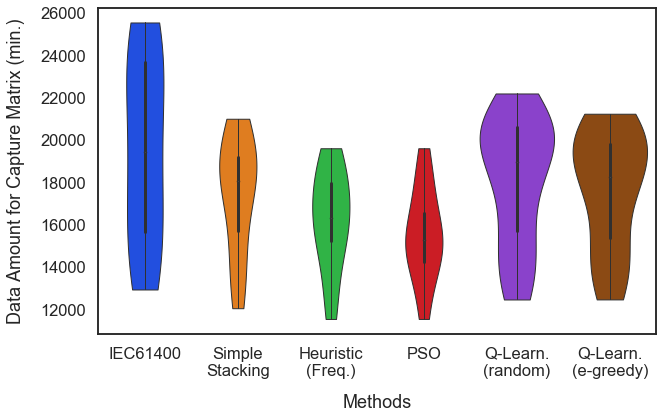

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

parts = sns.violinplot(data=df_comp,
                       x='method', 
                       y='duration',
#                        hue='hystersis',
                       scale='count',
                       linewidth=1,
                       split=True,
                       cut=0,
                       z=0)
ax.set_xticklabels(['IEC61400', 'Simple\nStacking', 'Heuristic\n(Freq.)', 'PSO', 'Q-Learn.\n(random)', 'Q-Learn.\n(e-greedy)'])
ax.set_xlabel('Methods', labelpad=15)
ax.set_ylabel('Data Amount for Capture Matrix (min.)', labelpad=15)

plt.show()


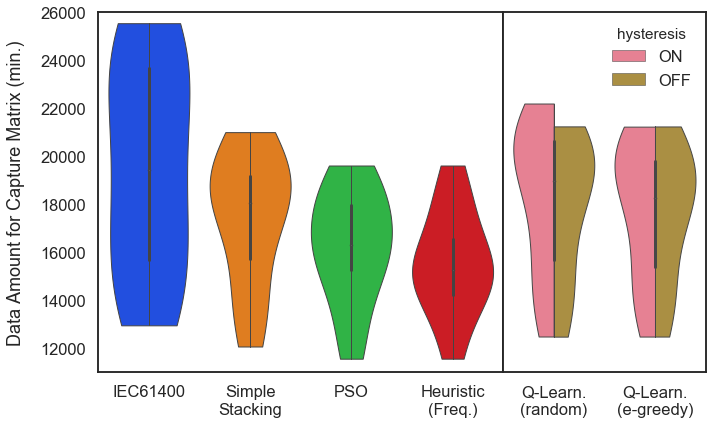

In [9]:
from matplotlib import gridspec

fig = plt.subplots(figsize=(10, 6), sharey=True)
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2,1], wspace=0)


# ax0

ax0 = plt.subplot(gs[0])
sns.violinplot(data=df_comp.iloc[:14*4],
               x='method', 
               y='duration',
#                        hue='hystersis',
               scale='count',
               linewidth=1,
               split=True,
               cut=0,
               z=0,
               ax=ax0)
# sns.stripplot(data=df_comp.iloc[:14*4],
#                x='method', 
#                y='duration',
#              jitter=False,
#              color='white',
#              edgecolor='black',
#              linewidth=1)

ax0.set_xticklabels(['IEC61400', 'Simple\nStacking', 'PSO', 'Heuristic\n(Freq.)', 'Q-Learn.\n(random)', 'Q-Learn.\n(e-greedy)'])
ax0.set_xlabel('')
ax0.set_ylabel('Data Amount for Capture Matrix (min.)', labelpad=15)
ax0.set_ylim([11000, 26000])

# ax1
ax1 = plt.subplot(gs[1])

with sns.color_palette("husl"):
  sns.violinplot(data=df_comp.iloc[14*4:],
                 x='method', 
                 y='duration',
                 hue='hysteresis',
                 scale='count',
                 linewidth=1,
                 split=True,
                 cut=0,
                 z=0,
                 ax=ax1)
  # sns.stripplot(data=df_comp.iloc[:14*4],
  #                x='method', 
  #                y='duration',
  #              jitter=False,
  #              color='white',
  #              edgecolor='black',
  #              linewidth=1)

ax1.set_xticklabels(['Q-Learn.\n(random)', 'Q-Learn.\n(e-greedy)'])
ax1.set_xlabel('')
ax1.set_ylim([11000, 26000])
ax1.set_yticklabels('')
ax1.set_ylabel('')

plt.subplots_adjust(wspace=0, left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.tight_layout()
plt.savefig('MethodsComp_DataAmount.png')
plt.show()


In [10]:
df_dur.head()

,IEC_dur,SS_dur,PSO_dur,Freq_dur,rand_on_dur,rand_off_dur,QL_on_dur,QL_off_dur
0,25550.0,20604.0,19610.0,19610.0,21232.0,21243.0,21233.0,21240.0
1,24130.0,19164.0,18170.0,18170.0,20904.0,19791.0,19790.0,19791.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24880.0,18055.0,16284.0,15268.0,20608.0,20617.0,20602.0,18082.0
4,23690.0,19188.0,19149.0,15470.0,19864.0,19776.0,19865.0,19784.0


In [11]:
df_dur_off = df_dur.drop(['rand_on_dur', 'QL_on_dur'], axis=1)
df_dur_off.head()

,IEC_dur,SS_dur,PSO_dur,Freq_dur,rand_off_dur,QL_off_dur
0,25550.0,20604.0,19610.0,19610.0,21243.0,21240.0
1,24130.0,19164.0,18170.0,18170.0,19791.0,19791.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,24880.0,18055.0,16284.0,15268.0,20617.0,18082.0
4,23690.0,19188.0,19149.0,15470.0,19776.0,19784.0


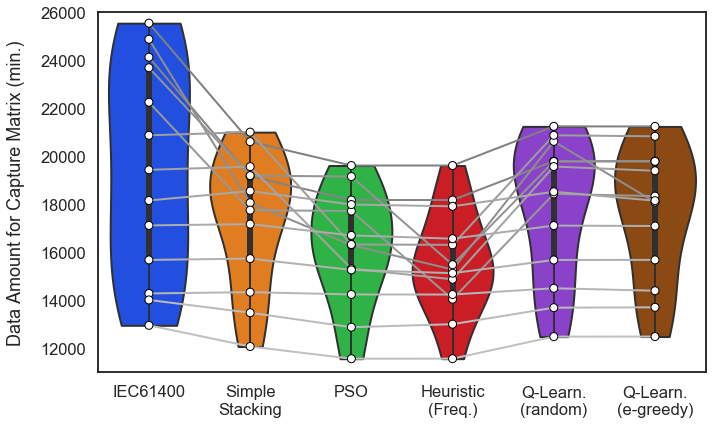

In [12]:
from matplotlib.collections import LineCollection

df_comp_off = df_comp[df_comp['hysteresis'] != 'ON']


fig, ax = plt.subplots(figsize=(10, 6), sharey=True)

sns.violinplot(data=df_comp_off,
               x='method', 
               y='duration',
               scale='count',
               linewidth=2,
               split=True,
               cut=0,
               z=0,
               ax=ax)

sns.stripplot(data=df_comp_off,
               x='method', 
               y='duration',
             jitter=False,
             color='white',
             edgecolor='black',
             linewidth=1,
             size=8)

for i in range(df_dur_off.shape[0]):
  color = plt.cm.gray(i/DATEMAX/4+0.5)
  ax.plot(df_dur_off.columns.tolist(), df_dur_off.iloc[i].tolist(), linewidth=2, color=color)

ax.set_xticklabels(['IEC61400', 'Simple\nStacking', 'PSO', 'Heuristic\n(Freq.)', 'Q-Learn.\n(random)', 'Q-Learn.\n(e-greedy)'])
ax.set_xlabel('')
ax.set_ylabel('Data Amount for Capture Matrix (min.)', labelpad=15)
ax.set_ylim([11000, 26000])
ax.set_xlim([-0.5, 5.5])

plt.subplots_adjust(left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.tight_layout()
plt.savefig('MethodsComp_DataAmount_off_line.png')
plt.show()


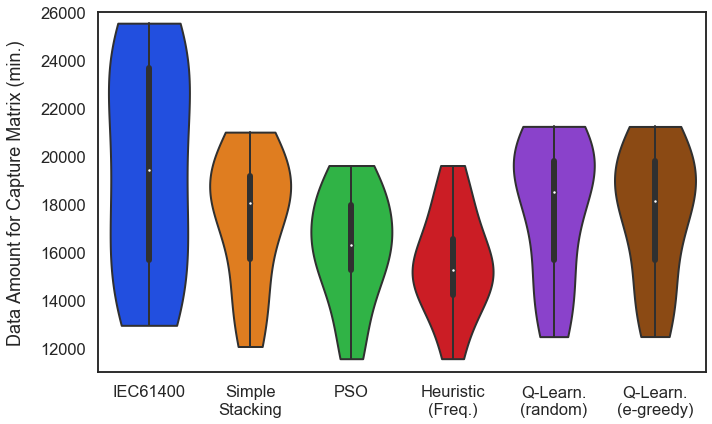

In [13]:
from matplotlib.collections import LineCollection

df_comp_off = df_comp[df_comp['hysteresis'] != 'ON']

fig, ax = plt.subplots(figsize=(10, 6), sharey=True)

sns.violinplot(data=df_comp_off,
               x='method', 
               y='duration',
               scale='count',
               linewidth=2,
               split=True,
               cut=0,
               z=0,
               ax=ax)

ax.set_xticklabels(['IEC61400', 'Simple\nStacking', 'PSO', 'Heuristic\n(Freq.)', 'Q-Learn.\n(random)', 'Q-Learn.\n(e-greedy)'])
ax.set_xlabel('')
ax.set_ylabel('Data Amount for Capture Matrix (min.)', labelpad=15)
ax.set_ylim([11000, 26000])
ax.set_xlim([-0.5, 5.5])

plt.subplots_adjust(left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.tight_layout()
plt.savefig('MethodsComp_DataAmount_off.png')
plt.show()


### 3. Data Gain comparision

In [14]:
df

,date_init,IEC_init,IEC_fin,IEC_dur,methods_init,SS_fin,SS_dur,PSO_fin,PSO_dur,Freq_fin,...,rand_off_fin,rand_off_dur,QL_on_fin,QL_on_dur,QL_off_fin,QL_off_dur,IEC_loss,methods_loss,date,delta_loss
0,0,1020.0,25550.0,25550.0,1013.0,20604.0,20604.0,19610.0,19610.0,19610.0,...,21243.0,21243.0,21233.0,21233.0,21240.0,21240.0,1020.0,1013.0,18,7.0
1,1440,2100.0,25570.0,24130.0,2094.0,20604.0,19164.0,19610.0,18170.0,19610.0,...,21231.0,19791.0,21230.0,19790.0,21231.0,19791.0,660.0,654.0,19,6.0
2,2880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN
3,4320,4830.0,29200.0,24880.0,4828.0,22375.0,18055.0,20604.0,16284.0,19588.0,...,24937.0,20617.0,24922.0,20602.0,22402.0,18082.0,510.0,508.0,21,2.0
4,5760,6290.0,29450.0,23690.0,6274.0,24948.0,19188.0,24909.0,19149.0,21230.0,...,25536.0,19776.0,25625.0,19865.0,25544.0,19784.0,530.0,514.0,22,16.0
5,7200,8220.0,29450.0,22250.0,8182.0,24948.0,17748.0,24909.0,17709.0,21230.0,...,25625.0,18425.0,25621.0,18421.0,25532.0,18332.0,1020.0,982.0,23,38.0
6,8640,8640.0,29510.0,20870.0,8630.0,29643.0,21003.0,24953.0,16313.0,24940.0,...,29511.0,20871.0,29427.0,20787.0,29468.0,20828.0,0.0,-10.0,24,10.0
7,10080,10150.0,29510.0,19430.0,10134.0,29643.0,19563.0,25386.0,15306.0,24940.0,...,29646.0,19566.0,29427.0,19347.0,29470.0,19390.0,70.0,54.0,25,16.0
8,11520,12030.0,29670.0,18150.0,12018.0,30064.0,18544.0,29501.0,17981.0,29427.0,...,30034.0,18514.0,29643.0,18123.0,29662.0,18142.0,510.0,498.0,26,12.0
9,12950,12950.0,30060.0,17110.0,12950.0,30114.0,17164.0,29643.0,16693.0,29506.0,...,30052.0,17102.0,29661.0,16711.0,30035.0,17085.0,0.0,0.0,27,0.0


In [27]:
df_gain = pd.DataFrame()
df_gain['SS'] = df['IEC_fin'] - df['SS_fin']
df_gain['PSO'] = df['IEC_fin'] - df['PSO_fin']
df_gain['Freq'] = df['IEC_fin'] - df['Freq_fin']
df_gain['QL_rand'] = df['IEC_fin'] - df['rand_off_fin']
df_gain['QL_egreedy'] = df['IEC_fin'] - df['QL_off_fin']

df_gain = df_gain.drop(2, axis=0).astype('int')

df_gain_summary = df_gain.describe()
print(df_gain_summary)

df_gain
print(df_gain)

                SS          PSO         Freq      QL_rand   QL_egreedy
count    13.000000    13.000000    13.000000    13.000000    13.000000
mean   2025.923077  3218.153846  3914.769231  1595.076923  1849.846154
std    2648.111637  2779.277359  3470.213998  2100.610128  2416.439524
min    -394.000000    42.000000    45.000000  -364.000000  -114.000000
25%     -54.000000   417.000000   554.000000    -1.000000    25.000000
50%     534.000000  4124.000000  4570.000000   324.000000   308.000000
75%    4502.000000  4557.000000  5960.000000  3914.000000  3918.000000
max    6825.000000  8596.000000  9612.000000  4339.000000  6798.000000
      SS   PSO  Freq  QL_rand  QL_egreedy
0   4946  5940  5940     4307        4310
1   4966  5960  5960     4339        4339
3   6825  8596  9612     4263        6798
4   4502  4541  8220     3914        3906
5   4502  4541  8220     3825        3918
6   -133  4557  4570       -1          42
7   -133  4124  4570     -136          40
8   -394   169   243     

In [24]:
type(df_gain['SS'].loc[2])

numpy.float64

array([ -400.,     0.,   400.,   800.,  1200.,  1600.,  2000.,  2400.,
        2800.,  3200.,  3600.,  4000.,  4400.,  4800.,  5200.,  5600.,
        6000.,  6400.,  6800.,  7200.,  7600.,  8000.,  8400.,  8800.,
        9200.,  9600., 10000.])

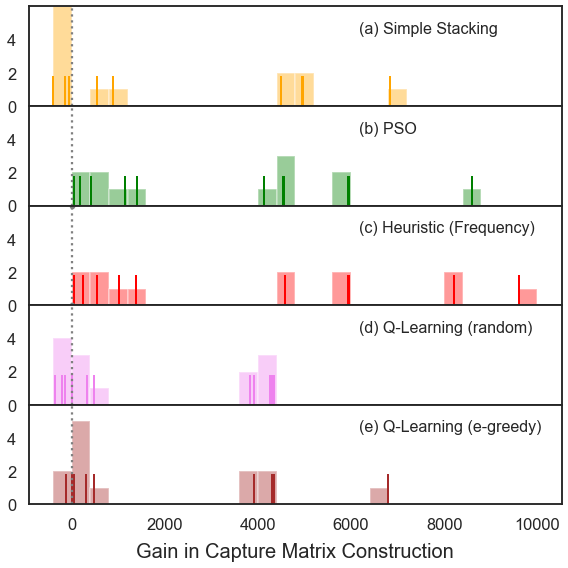

In [105]:
fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(8, 8), sharex=True, gridspec_kw={'hspace': 0})

bins = np.linspace(-400, 10000, 27)
sns.distplot(df_gain['SS'], kde=False, bins=bins, color='orange', 
             rug=True, rug_kws={"height":0.3, "linewidth": 2}, ax=axes[0])
sns.distplot(df_gain['PSO'], kde=False, bins=bins, color='green',
             rug=True, rug_kws={"height":0.3, "linewidth": 2}, ax=axes[1])
sns.distplot(df_gain['Freq'], kde=False, bins=bins, color='red',
             rug=True, rug_kws={"height":0.3, "linewidth": 2}, ax=axes[2])
sns.distplot(df_gain['QL_rand'], kde=False, bins=bins, color='violet',
             rug=True, rug_kws={"height":0.3, "linewidth": 2}, ax=axes[3])
sns.distplot(df_gain['QL_egreedy'], kde=False, bins=bins, color='brown',
             rug=True, rug_kws={"height":0.3, "linewidth": 2}, ax=axes[4])

axes[0].plot([0,0], [0,6], ':', color='gray')
axes[1].plot([0,0], [0,6], ':', color='gray')
axes[2].plot([0,0], [0,6], ':.', color='gray')
axes[3].plot([0,0], [0,6], ':', color='gray')
axes[4].plot([0,0], [0,6], ':', color='gray')

for i in range(5):
  axes[i].set_ylim(0, 6)
  axes[i].set_yticks([0, 2, 4])

boxprops = dict(boxstyle='round', facecolor='white', alpha=0)
text_x = 0.62
text_y = 0.85
axes[0].text(text_x, text_y, '(a) Simple Stacking', transform=axes[0].transAxes, fontsize=16, verticalalignment='top', bbox=boxprops)
axes[1].text(text_x, text_y, '(b) PSO', transform=axes[1].transAxes, fontsize=16, verticalalignment='top', bbox=boxprops)
axes[2].text(text_x, text_y, '(c) Heuristic (Frequency)', transform=axes[2].transAxes, fontsize=16, verticalalignment='top', bbox=boxprops)
axes[3].text(text_x, text_y, '(d) Q-Learning (random)', transform=axes[3].transAxes, fontsize=16, verticalalignment='top', bbox=boxprops)
axes[4].text(text_x, text_y, '(e) Q-Learning (e-greedy)', transform=axes[4].transAxes, fontsize=16, verticalalignment='top', bbox=boxprops)

axes[4].set_xlabel('Gain in Capture Matrix Construction', labelpad = 10, fontsize=20)

fig.align_ylabels()
plt.subplots_adjust(left=0.05, right=0.95, top=0.99, bottom=0.12)
plt.tight_layout()
plt.savefig('MethodsComp_Gain.png')
